In [6]:
from music21 import converter, instrument, note, chord
#from music21 import *
import pretty_midi
#import fluidsynth
import mido

import glob

import string
import numpy as np
import matplotlib.pyplot as plt

import pickle
import numpy
from music21 import instrument, note, stream, chord
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Activation

In [7]:
file = converter.parse('midi_files/chpn-p1.mid')

In [8]:
file

<music21.stream.Score 0x2910ea0e0>

In [9]:
components = []
for element in file.recurse():
    components.append(element)


In [10]:
components

 <music21.stream.Part 0x2910e8700>,
 <music21.stream.Measure 1 offset=0.0>,
 <music21.instrument.Piano 'Piano right: Piano right'>,
 <music21.instrument.Piano 'Piano'>,
 <music21.clef.TrebleClef>,
 <music21.tempo.MetronomeMark Quarter=69.0>,
 <music21.tempo.MetronomeMark Quarter=69.5>,
 <music21.key.Key of C major>,
 <music21.meter.TimeSignature 2/8>,
 <music21.stream.Voice 0x2912068c0>,
 <music21.note.Rest 1/3ql>,
 <music21.chord.Chord C4 E4>,
 <music21.note.Rest 1/6ql>,
 <music21.note.Note A>,
 <music21.stream.Voice 0x2911c1360>,
 <music21.note.Rest eighth>,
 <music21.chord.Chord G4 E4 C4>,
 <music21.note.Rest 16th>,
 <music21.tempo.MetronomeMark andante Quarter=70.0>,
 <music21.tempo.MetronomeMark andante Quarter=70.5>,
 <music21.tempo.MetronomeMark andante Quarter=71.0>,
 <music21.tempo.MetronomeMark andante Quarter=71.5>,
 <music21.tempo.MetronomeMark andante Quarter=72.0>,
 <music21.tempo.MetronomeMark andante Quarter=72.5>,
 <music21.tempo.MetronomeMark andante Quarter=73.0>,
 <

In [11]:
notes = []
midi = converter.parse('midi_files/chpn-p1.mid')
notes_to_parse = None
parts = instrument.partitionByInstrument(midi)
notes_to_parse = midi.flat.notes
for element in notes_to_parse:
    if isinstance(element, note.Note):
        notes.append(str(element.pitch))
    elif isinstance(element, chord.Chord):
        notes.append('.'.join(str(n) for n in element.normalOrder))

In [12]:
notes

['7.0',
 'G3',
 '0.4',
 'E3',
 '0.4.7',
 'A4',
 '9.11',
 'G3',
 '5.7',
 '2.5',
 '2.5.7',
 'A4',
 '9.0',
 'G3',
 '4.7',
 '0.4',
 '0.4.7',
 'A4',
 '4.9',
 'B3',
 '4.7',
 '4.7',
 '4.7.11',
 'C5',
 '0.5',
 'E4',
 '4.9',
 '9.0',
 '9.0.4',
 '2',
 '2.6',
 'E4',
 '9.0',
 'C4',
 '9.0.4',
 '2',
 '5.7',
 'E4',
 '7.11',
 'B3',
 '4.7.11',
 '2',
 '7',
 'B3',
 '2.5',
 'F3',
 '11.2.5',
 'A4',
 '9.0',
 'G3',
 '4.7',
 '0.4',
 '0.4.7',
 'A4',
 '9.11',
 'G3',
 '5.7',
 '2.5',
 '2.5.7',
 'A4',
 '9.0',
 'G3',
 '4.7',
 '0.4',
 '0.4.7',
 'A4',
 '4.9',
 'B3',
 '4.7',
 '4.7',
 '4.7.11',
 'C5',
 '0.5',
 'C#4',
 '9.0',
 '5.9',
 '1.5.9',
 '2',
 '7.0',
 'E-4',
 '7.0',
 'B-3',
 '0.3.7',
 '4',
 '5.9',
 'G4',
 '9.0',
 'C4',
 '7.9.0',
 '5',
 '7.0',
 'E-4',
 '7.0',
 'C4',
 '0.3.7',
 '4',
 '5.9',
 'E4',
 '9.0',
 'C4',
 '9.0.4',
 '5',
 'F#4',
 '7.11',
 'B4',
 'D4',
 '11.2.6',
 '7',
 'G#4',
 '7.0',
 'C5',
 'E4',
 '0.4.8',
 '9',
 'B-4',
 '2.7',
 'D5',
 'F4',
 '7.10.2',
 '11',
 '0.4',
 'D5',
 '4.7',
 'G4',
 '2.4.7',
 '0',
 '3

In [13]:
len(notes)

203

In [14]:
notes = []

midi = converter.parse('midi_files/chpn-p1.mid')
notes_to_parse = None
parts = instrument.partitionByInstrument(midi)
if parts: # file has instrument parts
    notes_to_parse = parts.parts[0].recurse()
else: # file has notes in a flat structure
    notes_to_parse = midi.flat.notes
for element in notes_to_parse:
    if isinstance(element, note.Note):
        notes.append(str(element.pitch))
    elif isinstance(element, chord.Chord):
        notes.append('.'.join(str(n) for n in element.normalOrder))

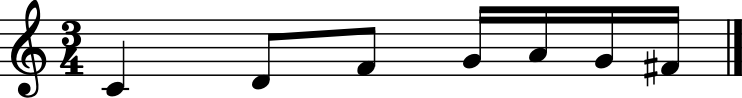

In [15]:
converter.parse("tinynotation: 3/4 c4 d8 f g16 a g f#").show()

In [16]:
midi = converter.parse('midi_files/chpn-p1.mid')
notes_to_parse = None

parts = instrument.partitionByInstrument(midi)

instrument_names = []


for instrument in parts: # Learn names of instruments.
    name = (str(instrument).split(' ')[-1])[:-1]
    instrument_names.append(name)

"""except TypeError:
    print ('Type is not iterable.')
    return None
    
    # Just take piano part. For the future works, we can use different instrument.
    try:
        piano_index = instrument_names.index('Piano')
    except ValueError:
        print ('%s have not any Piano part' %(filename))
        return None
    
    
    notes_to_parse = parts.parts[piano_index].recurse()
    
    duration_piano = float(check_float((str(notes_to_parse._getDuration()).split(' ')[-1])[:-1]))

    durations = []
    notes = []
    offsets = []
    
    for element in notes_to_parse:
        if isinstance(element, note.Note): # If it is single note
            notes.append(note_to_int(str(element.pitch))) # Append note's integer value to "notes" list.
            duration = str(element.duration)[27:-1] 
            durations.append(check_float(duration)) 
            offsets.append(element.offset)

        elif isinstance(element, chord.Chord): # If it is chord
            notes.append('.'.join(str(note_to_int(str(n)))
                                  for n in element.pitches))
            duration = str(element.duration)[27:-1]
            durations.append(check_float(duration))
            offsets.append(element.offset)"""

'except TypeError:\n    print (\'Type is not iterable.\')\n    return None\n    \n    # Just take piano part. For the future works, we can use different instrument.\n    try:\n        piano_index = instrument_names.index(\'Piano\')\n    except ValueError:\n        print (\'%s have not any Piano part\' %(filename))\n        return None\n    \n    \n    notes_to_parse = parts.parts[piano_index].recurse()\n    \n    duration_piano = float(check_float((str(notes_to_parse._getDuration()).split(\' \')[-1])[:-1]))\n\n    durations = []\n    notes = []\n    offsets = []\n    \n    for element in notes_to_parse:\n        if isinstance(element, note.Note): # If it is single note\n            notes.append(note_to_int(str(element.pitch))) # Append note\'s integer value to "notes" list.\n            duration = str(element.duration)[27:-1] \n            durations.append(check_float(duration)) \n            offsets.append(element.offset)\n\n        elif isinstance(element, chord.Chord): # If it is ch

In [17]:
instrument_names

['right', 'Piano', 'left']

In [68]:
pm = pretty_midi.PrettyMIDI('midi_files/chpn-p1.mid')

In [69]:
# Sampling rate for audio playback
_SAMPLING_RATE = 16000
def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

In [72]:
mid = mido.MidiFile('midi_files/chpn-p1.mid', clip = True)
mid.tracks

[MidiTrack([
   MetaMessage('track_name', name='Chopin Prelude  No. 1, Opus 28', time=0),
   MetaMessage('copyright', text='Copyright © 2002 by Bernd Krueger ', time=0),
   MetaMessage('text', text='Frederic Chopin', time=0),
   MetaMessage('text', text='Agitato', time=0),
   MetaMessage('text', text='Fertiggestellt am 27.8.2002\n', time=0),
   MetaMessage('text', text='Normierung: 23.12.2002\n', time=0),
   MetaMessage('text', text='Update am 24.12.2002\n', time=0),
   MetaMessage('text', text='Update am 2.6.2010\n', time=0),
   MetaMessage('text', text='Update am 20.2.2014\n', time=0),
   MetaMessage('text', text='Dauer: 0:34 Minuten\n', time=0),
   MetaMessage('smpte_offset', frame_rate=25, hours=32, minutes=0, seconds=3, frames=0, sub_frames=0, time=0),
   MetaMessage('time_signature', numerator=2, denominator=8, clocks_per_click=12, notated_32nd_notes_per_beat=8, time=0),
   MetaMessage('key_signature', key='C', time=0),
   MetaMessage('set_tempo', tempo=869565, time=0),
   MetaMe

In [73]:
for m in mid.tracks[0][:20]:
    print(m)

MetaMessage('track_name', name='Chopin Prelude  No. 1, Opus 28', time=0)
MetaMessage('copyright', text='Copyright © 2002 by Bernd Krueger ', time=0)
MetaMessage('text', text='Frederic Chopin', time=0)
MetaMessage('text', text='Agitato', time=0)
MetaMessage('text', text='Fertiggestellt am 27.8.2002\n', time=0)
MetaMessage('text', text='Normierung: 23.12.2002\n', time=0)
MetaMessage('text', text='Update am 24.12.2002\n', time=0)
MetaMessage('text', text='Update am 2.6.2010\n', time=0)
MetaMessage('text', text='Update am 20.2.2014\n', time=0)
MetaMessage('text', text='Dauer: 0:34 Minuten\n', time=0)
MetaMessage('smpte_offset', frame_rate=25, hours=32, minutes=0, seconds=3, frames=0, sub_frames=0, time=0)
MetaMessage('time_signature', numerator=2, denominator=8, clocks_per_click=12, notated_32nd_notes_per_beat=8, time=0)
MetaMessage('key_signature', key='C', time=0)
MetaMessage('set_tempo', tempo=869565, time=0)
MetaMessage('set_tempo', tempo=863309, time=40)
MetaMessage('set_tempo', tempo

In [74]:
for m in mid.tracks[2][:20]:
    print(m)

MetaMessage('track_name', name='Piano left', time=0)
program_change channel=0 program=0 time=0
control_change channel=0 control=7 value=100 time=0
control_change channel=0 control=10 value=64 time=0
control_change channel=0 control=91 value=127 time=0
control_change channel=0 control=91 value=127 time=0
control_change channel=0 control=64 value=127 time=0
note_on channel=0 note=36 velocity=46 time=1
note_on channel=0 note=36 velocity=0 time=79
note_on channel=0 note=55 velocity=36 time=0
note_on channel=0 note=43 velocity=30 time=0
note_on channel=0 note=43 velocity=0 time=80
note_on channel=0 note=52 velocity=36 time=0
note_on channel=0 note=52 velocity=0 time=80
note_on channel=0 note=55 velocity=0 time=160
note_on channel=0 note=57 velocity=27 time=0
note_on channel=0 note=57 velocity=0 time=80
note_on channel=0 note=35 velocity=51 time=0
control_change channel=0 control=64 value=0 time=10
control_change channel=0 control=64 value=127 time=25


In [75]:
for m in mid.tracks[3][:20]:
    print(m)

MetaMessage('track_name', name='Chopin: Prelude No.1 in C, Op. 28', time=0)
MetaMessage('end_of_track', time=0)


In [76]:
for m in mid.tracks[0][:20]:
    print(m)

MetaMessage('track_name', name='Chopin Prelude  No. 1, Opus 28', time=0)
MetaMessage('copyright', text='Copyright © 2002 by Bernd Krueger ', time=0)
MetaMessage('text', text='Frederic Chopin', time=0)
MetaMessage('text', text='Agitato', time=0)
MetaMessage('text', text='Fertiggestellt am 27.8.2002\n', time=0)
MetaMessage('text', text='Normierung: 23.12.2002\n', time=0)
MetaMessage('text', text='Update am 24.12.2002\n', time=0)
MetaMessage('text', text='Update am 2.6.2010\n', time=0)
MetaMessage('text', text='Update am 20.2.2014\n', time=0)
MetaMessage('text', text='Dauer: 0:34 Minuten\n', time=0)
MetaMessage('smpte_offset', frame_rate=25, hours=32, minutes=0, seconds=3, frames=0, sub_frames=0, time=0)
MetaMessage('time_signature', numerator=2, denominator=8, clocks_per_click=12, notated_32nd_notes_per_beat=8, time=0)
MetaMessage('key_signature', key='C', time=0)
MetaMessage('set_tempo', tempo=869565, time=0)
MetaMessage('set_tempo', tempo=863309, time=40)
MetaMessage('set_tempo', tempo

In [77]:
for m in mid.tracks[1][:20]:
    print(m)

MetaMessage('track_name', name='Piano right', time=0)
program_change channel=0 program=0 time=0
control_change channel=0 control=7 value=100 time=0
control_change channel=0 control=10 value=64 time=0
control_change channel=0 control=91 value=127 time=0
MetaMessage('text', text='bdca426d104a26ac9dcb070447587523', time=0)
note_on channel=0 note=60 velocity=49 time=160
note_on channel=0 note=60 velocity=0 time=80
note_on channel=0 note=67 velocity=53 time=0
note_on channel=0 note=64 velocity=33 time=0
note_on channel=0 note=64 velocity=0 time=80
note_on channel=0 note=60 velocity=43 time=0
note_on channel=0 note=60 velocity=0 time=80
note_on channel=0 note=67 velocity=0 time=0
note_on channel=0 note=69 velocity=43 time=0
note_on channel=0 note=69 velocity=0 time=80
note_on channel=0 note=62 velocity=51 time=160
note_on channel=0 note=62 velocity=0 time=80
note_on channel=0 note=67 velocity=59 time=0
note_on channel=0 note=65 velocity=40 time=0


In [78]:
for m in mid.tracks[2][:20]:
    print(m)

MetaMessage('track_name', name='Piano left', time=0)
program_change channel=0 program=0 time=0
control_change channel=0 control=7 value=100 time=0
control_change channel=0 control=10 value=64 time=0
control_change channel=0 control=91 value=127 time=0
control_change channel=0 control=91 value=127 time=0
control_change channel=0 control=64 value=127 time=0
note_on channel=0 note=36 velocity=46 time=1
note_on channel=0 note=36 velocity=0 time=79
note_on channel=0 note=55 velocity=36 time=0
note_on channel=0 note=43 velocity=30 time=0
note_on channel=0 note=43 velocity=0 time=80
note_on channel=0 note=52 velocity=36 time=0
note_on channel=0 note=52 velocity=0 time=80
note_on channel=0 note=55 velocity=0 time=160
note_on channel=0 note=57 velocity=27 time=0
note_on channel=0 note=57 velocity=0 time=80
note_on channel=0 note=35 velocity=51 time=0
control_change channel=0 control=64 value=0 time=10
control_change channel=0 control=64 value=127 time=25


In [79]:
for m in mid.tracks[3][:20]:
    print(m)

MetaMessage('track_name', name='Chopin: Prelude No.1 in C, Op. 28', time=0)
MetaMessage('end_of_track', time=0)


In [80]:
def msg2dict(msg):
    result = dict()
    if 'note_on' in msg:
        on_ = True
    elif 'note_off' in msg:
        on_ = False
    else:
        on_ = None
    result['time'] = int(msg[msg.rfind('time'):].split(' ')[0].split('=')[1].translate(
        str.maketrans({a: None for a in string.punctuation})))

    if on_ is not None:
        for k in ['note', 'velocity']:
            result[k] = int(msg[msg.rfind(k):].split(' ')[0].split('=')[1].translate(
                str.maketrans({a: None for a in string.punctuation})))
    return [result, on_]

In [81]:
def get_new_state(new_msg, last_state):
    new_msg, on_ = msg2dict(str(new_msg))
    new_state = switch_note(last_state, note=new_msg['note'], velocity=new_msg['velocity'], on_=on_) if on_ is not None else last_state
    return [new_state, new_msg['time']]
def track2seq(track):
    # piano has 88 notes, corresponding to note id 21 to 108, any note out of the id range will be ignored
    result = []
    last_state, last_time = get_new_state(str(track[0]), [0]*88)
    for i in range(1, len(track)):
        new_state, new_time = get_new_state(track[i], last_state)
        if new_time > 0:
            result += [last_state]*new_time
        last_state, last_time = new_state, new_time
    return result

In [82]:
def switch_note(last_state, note, velocity, on_=True):
    # piano has 88 notes, corresponding to note id 21 to 108, any note out of this range will be ignored
    result = [0] * 88 if last_state is None else last_state.copy()
    if 21 <= note <= 108:
        result[note-21] = velocity if on_ else 0
    return result

In [83]:
def mid2arry(mid, min_msg_pct=0.1):
    tracks_len = [len(tr) for tr in mid.tracks]
    min_n_msg = max(tracks_len) * min_msg_pct
    # convert each track to nested list
    all_arys = []
    for i in range(len(mid.tracks)):
        if len(mid.tracks[i]) > min_n_msg:
            ary_i = track2seq(mid.tracks[i])
            all_arys.append(ary_i)
    # make all nested list the same length
    max_len = max([len(ary) for ary in all_arys])
    for i in range(len(all_arys)):
        if len(all_arys[i]) < max_len:
            all_arys[i] += [[0] * 88] * (max_len - len(all_arys[i]))
    all_arys = np.array(all_arys)
    all_arys = all_arys.max(axis=0)
    # trim: remove consecutive 0s in the beginning and at the end
    sums = all_arys.sum(axis=1)
    ends = np.where(sums > 0)[0]
    return all_arys[min(ends): max(ends)]

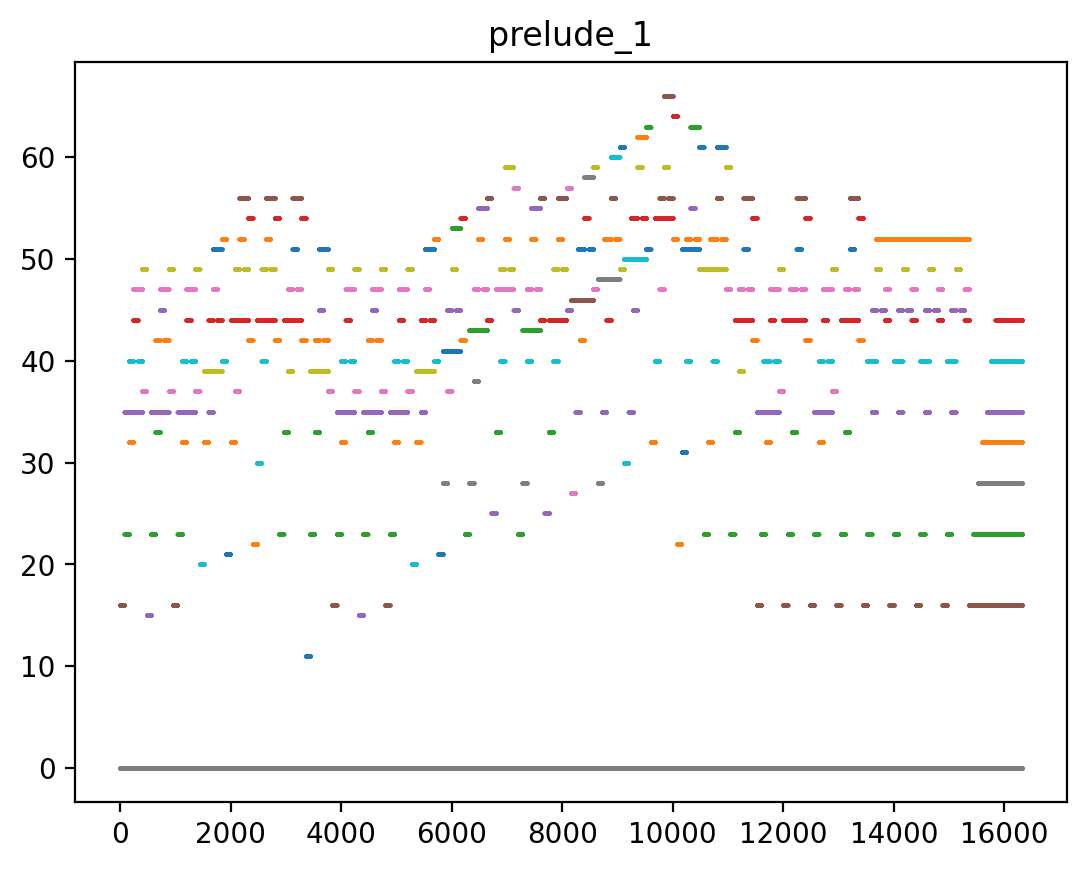

In [84]:

result_array = mid2arry(mid)

plt.plot(range(result_array.shape[0]), np.multiply(np.where(result_array>0, 1, 0), range(1, 89)), marker='.', markersize=1, linestyle='')
plt.title("prelude_1")
plt.show()

In [85]:
def arry2mid(ary, tempo=500000):
    # get the difference
    new_ary = np.concatenate([np.array([[0] * 88]), np.array(ary)], axis=0)
    changes = new_ary[1:] - new_ary[:-1]
    # create a midi file with an empty track
    mid_new = mido.MidiFile()
    track = mido.MidiTrack()
    mid_new.tracks.append(track)
    track.append(mido.MetaMessage('set_tempo', tempo=tempo, time=0))
    # add difference in the empty track
    last_time = 0
    for ch in changes:
        if set(ch) == {0}:  # no change
            last_time += 1
        else:
            on_notes = np.where(ch > 0)[0]
            on_notes_vol = ch[on_notes]
            off_notes = np.where(ch < 0)[0]
            first_ = True
            for n, v in zip(on_notes, on_notes_vol):
                new_time = last_time if first_ else 0
                track.append(mido.Message('note_on', note=n + 21, velocity=v, time=new_time))
                first_ = False
            for n in off_notes:
                new_time = last_time if first_ else 0
                track.append(mido.Message('note_off', note=n + 21, velocity=0, time=new_time))
                first_ = False
            last_time = 0
    return mid_new

In [86]:
mid_new = arry2mid(result_array, 800000)
mid_new.save('prelude_1_to_0.mid')

In [28]:

notes = []

midi = converter.parse('data/mid_new.mid')
notes_to_parse = None
parts = instrument.partitionByInstrument(midi)
if parts: # file has instrument parts
    notes_to_parse = parts.parts[0].recurse()
else: # file has notes in a flat structure
    notes_to_parse = midi.flat.notes
for element in notes_to_parse:
    if isinstance(element, note.Note):
        notes.append(str(element.pitch))
    elif isinstance(element, chord.Chord):
        notes.append('.'.join(str(n) for n in element.normalOrder))


In [29]:
notes

['7.0',
 'G3',
 '0.4',
 '7.0',
 '9.11',
 '2.5.7',
 'G3',
 '2.5.7',
 '9.0',
 '0.4.7',
 'G3',
 '0.4.7',
 '4.9',
 '4.7',
 'B3',
 '4.7.11',
 '0.5',
 '4.9',
 'E4',
 '9.0.4',
 '2.6',
 '9.0.2',
 'E4',
 '9.0.4',
 '2.7',
 '5.7.11',
 'E4',
 '4.7.11',
 '2.7',
 '2.5.7',
 'B3',
 '11.2.5',
 '9.0',
 '0.4.7',
 'G3',
 '0.4.7',
 '9.11',
 '2.5.7',
 'G3',
 '2.5.7',
 '9.0',
 '0.4.7',
 'G3',
 '0.4.7',
 '4.9',
 '4.7',
 'B3',
 '4.7.11',
 '0.5',
 '5.9.0',
 'C#4',
 '1.5.9',
 '2.7',
 '7.10.0',
 'E-4',
 '0.3.7',
 '4.9',
 '5.9.0',
 'G4',
 '7.9.0',
 '5.7',
 '7.0',
 'E-4',
 '0.3.7',
 '4.9',
 '5.9.0',
 'E4',
 '9.0.4',
 '5.11',
 'F#4',
 '7.11.2',
 '11.2.6',
 '7.0',
 'G#4',
 '0.4.7',
 '0.4.8',
 '9.2',
 'B-4',
 '2.5.7',
 '7.10.2',
 '11.4',
 '0.4.7',
 'D5',
 '2.4.7',
 '0.6',
 '0.3',
 'B4',
 '11.0.3',
 'A4',
 '7.9',
 'A4',
 '0.4',
 '9.0.4',
 '7',
 '5.7.11',
 'E4',
 '4.7.11',
 '0.2',
 'G3',
 '0.4.7',
 'A4',
 'G3',
 '0.4.7',
 '9.0',
 'A4',
 'E4',
 '5.7',
 '4.7.11',
 '0.2',
 '0.4.7',
 'G3',
 '0.4.7',
 '9.0',
 'A4',
 '5.7',
 

In [30]:
len(notes)

135

In [47]:
notes = []
for file in glob.glob("midi_files/*.mid"):
    midi = converter.parse(file)
    notes_to_parse = None
    parts = instrument.partitionByInstrument(midi)
    if parts: # file has instrument parts
        notes_to_parse = parts.parts[0].recurse()
    else: # file has notes in a flat structure
        notes_to_parse = midi.flat.notes
    for element in notes_to_parse:
        if isinstance(element, note.Note):
            notes.append(str(element.pitch))
        elif isinstance(element, chord.Chord):
            notes.append('.'.join(str(n) for n in element.normalOrder))

In [48]:
notes

['1.5',
 'G#3',
 'C#5',
 '1.5.8',
 'G#3',
 'G#3',
 'G#3',
 'B-4',
 '1.5',
 'G#3',
 '0.3.6',
 'G#3',
 'G#3',
 'G#3',
 'B-3',
 'G#3',
 'C#5',
 '1.5',
 'G#3',
 '3.6',
 'C4',
 'G#3',
 '5.8',
 '6.10',
 'G#3',
 'G#3',
 'G#3',
 '8.1',
 'F5',
 'G#3',
 'G#4',
 'F5',
 'C4',
 'G#3',
 'F#4',
 '3.8',
 'C#5',
 '1.5',
 'G#3',
 '3',
 '0.5.6',
 '2.3',
 '5.8',
 '3.5',
 'F#5',
 '1.5',
 'G#3',
 'C#5',
 'G#4',
 '1.5',
 'G#3',
 'G#3',
 'G#3',
 'B-4',
 'G#3',
 'G#3',
 '0.3.6',
 'G#3',
 'G#3',
 'G#3',
 'B-3',
 'G#3',
 'C#5',
 '1.5',
 'G#3',
 '3.6',
 'C4',
 'G#3',
 '5.8',
 '6.10',
 'G#3',
 'G#3',
 'G#3',
 '8.1',
 'F5',
 'G#3',
 'G#4',
 'F5',
 'C4',
 'G#3',
 'F#4',
 '3.8',
 'C#5',
 '1.5',
 'G#3',
 '0.1.5',
 '8.1',
 'E-5',
 'G#2',
 'G#3',
 'E-5',
 '0.3',
 'G#3',
 '11.3',
 'G#3',
 'F5',
 '11.1.5',
 'C#4',
 '6.10',
 '1.5',
 '3.6.10',
 '1',
 'F5',
 'C#3',
 'G#3',
 '1.5',
 'G#3',
 '3',
 '8.11',
 '10.11.3',
 '8',
 'B-4',
 'E-3',
 'G3',
 '8.10.11',
 '10.1.3',
 'G3',
 'B4',
 'G#4',
 'G#2',
 'G#3',
 'E-5',
 '11.3',
 'G#

In [52]:
len(notes)

9425

In [36]:
def prepare_sequences(notes, pitchnames, n_vocab):
    """ Prepare the sequences used by the Neural Network """
    # map between notes and integers and back
    note_to_int = dict((note, number) for number, note in enumerate(pitchnames))

    sequence_length = 100
    network_input = []
    output = []
    for i in range(0, len(notes) - sequence_length, 1):
        sequence_in = notes[i:i + sequence_length]
        sequence_out = notes[i + sequence_length]
        network_input.append([note_to_int[char] for char in sequence_in])
        output.append(note_to_int[sequence_out])

    n_patterns = len(network_input)

    # reshape the input into a format compatible with LSTM layers
    normalized_input = numpy.reshape(network_input, (n_patterns, sequence_length, 1))
    # normalize input
    normalized_input = normalized_input / float(n_vocab)

    return (network_input, normalized_input)

In [43]:
def create_network(network_input, n_vocab):
    """ create the structure of the neural network """
    model = Sequential()
    model.add(LSTM(
        512,
        input_shape=(network_input.shape[1], network_input.shape[2]),
        return_sequences=True
    ))
    model.add(Dropout(0.3))
    model.add(LSTM(512, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(512))
    model.add(Dense(256))
    model.add(Dropout(0.3))
    model.add(Dense(n_vocab))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

    # Load the weights to each node
    #model.load_weights('weights.hdf5')

    return model

In [38]:
def generate_notes(model, network_input, pitchnames, n_vocab):
    """ Generate notes from the neural network based on a sequence of notes """
    # pick a random sequence from the input as a starting point for the prediction
    start = numpy.random.randint(0, len(network_input)-1)

    int_to_note = dict((number, note) for number, note in enumerate(pitchnames))

    pattern = network_input[start]
    prediction_output = []

    # generate 500 notes
    for note_index in range(500):
        prediction_input = numpy.reshape(pattern, (1, len(pattern), 1))
        prediction_input = prediction_input / float(n_vocab)

        prediction = model.predict(prediction_input, verbose=0)

        index = numpy.argmax(prediction)
        result = int_to_note[index]
        prediction_output.append(result)

        pattern.append(index)
        pattern = pattern[1:len(pattern)]

    return prediction_output

In [39]:
def create_midi(prediction_output):
    """ convert the output from the prediction to notes and create a midi file
        from the notes """
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                new_note = note.Note(int(current_note))
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
        # pattern is a note
        else:
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 0.5

    midi_stream = stream.Stream(output_notes)

    midi_stream.write('midi', fp='test_output.mid')

In [50]:
def generate():
    """ Generate a piano midi file """
    #load the notes used to train the model
    #with open('data/notes', 'rb') as filepath:
        #notes = pickle.load(filepath)

    # Get all pitch names
    pitchnames = sorted(set(item for item in notes))
    # Get all pitch names
    n_vocab = len(set(notes))

    network_input, normalized_input = prepare_sequences(notes, pitchnames, n_vocab)
    model = create_network(normalized_input, n_vocab)
    prediction_output = generate_notes(model, network_input, pitchnames, n_vocab)
    create_midi(prediction_output)

In [51]:
generate()

In [91]:
pm = pretty_midi.PrettyMIDI('midi_files/chpn-p1_format0.mid')

In [92]:
mid = mido.MidiFile('midi_files/chpn-p1_format0.mid', clip = True)
mid.tracks

[MidiTrack([
   MetaMessage('track_name', name='Chopin Prelude  No. 1, Opus 28', time=0),
   MetaMessage('copyright', text='Copyright © 2002 by Bernd Krueger ', time=0),
   MetaMessage('text', text='Frederic Chopin', time=0),
   MetaMessage('text', text='Agitato', time=0),
   MetaMessage('text', text='Fertiggestellt am 27.8.2002\n', time=0),
   MetaMessage('text', text='Normierung: 23.12.2002\n', time=0),
   MetaMessage('text', text='Update am 24.12.2002\n', time=0),
   MetaMessage('text', text='Update am 2.6.2010\n', time=0),
   MetaMessage('text', text='Update am 20.2.2014\n', time=0),
   MetaMessage('text', text='Dauer: 0:34 Minuten\n', time=0),
   MetaMessage('smpte_offset', frame_rate=25, hours=32, minutes=0, seconds=3, frames=0, sub_frames=0, time=0),
   MetaMessage('time_signature', numerator=2, denominator=8, clocks_per_click=12, notated_32nd_notes_per_beat=8, time=0),
   MetaMessage('key_signature', key='C', time=0),
   MetaMessage('set_tempo', tempo=869565, time=0),
   Messag

In [96]:
for m in mid.tracks[0][100:200]:
    print(m)

note_on channel=0 note=57 velocity=0 time=0
note_on channel=0 note=69 velocity=0 time=0
note_on channel=0 note=36 velocity=53 time=0
control_change channel=0 control=64 value=0 time=11
control_change channel=0 control=64 value=127 time=24
MetaMessage('set_tempo', tempo=794702, time=5)
MetaMessage('set_tempo', tempo=789474, time=24)
note_on channel=0 note=36 velocity=0 time=16
note_on channel=0 note=55 velocity=56 time=0
note_on channel=0 note=43 velocity=47 time=0
MetaMessage('set_tempo', tempo=784314, time=12)
MetaMessage('set_tempo', tempo=779221, time=28)
MetaMessage('set_tempo', tempo=774194, time=24)
note_on channel=0 note=43 velocity=0 time=16
note_on channel=0 note=60 velocity=59 time=0
note_on channel=0 note=52 velocity=47 time=0
MetaMessage('set_tempo', tempo=769231, time=12)
MetaMessage('set_tempo', tempo=764331, time=28)
MetaMessage('set_tempo', tempo=764331, time=20)
MetaMessage('set_tempo', tempo=769231, time=20)
note_on channel=0 note=52 velocity=0 time=0
note_on channel=